# Usage examples for `lmdiag`

Notebook Source: https://github.com/dynobo/lmdiag/blob/main/example.ipynb

**Contents:**

- [Preparation](#Preparation)
- [Create facet chart with all plots](#Create-facet-chart-with-all-plots)
  - [For statsmodels](#For-statsmodels)
  - [For linearmodels](#For-linearmodels)
  - [For sklearn](#For-sklearn)
- [Create individual plots](#Create-individual-plots)
- [Customize appearance](#Customize-appearance)
  - [Use a matplotlib style](#Use-a-matplotlib-style)
  - [Modify the returned matplotlib.Figure](#Modify-the-returned-matplotlib.Figure)
  - [Use a lmdiag preset](#Use-a-lmdiag-preset)
  - [Override plotting kwargs](#Override-plotting-kwargs)
- [Print helpful information](#Print-helpful-information)

## Preparation

In [1]:
import lmdiag
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from linearmodels.iv import IV2SLS
from sklearn.linear_model import LinearRegression

%matplotlib inline

# Generate some random data for our models
np.random.seed(20)
X = np.random.normal(size=30, loc=20, scale=3)
y = 5 + 5 * X + np.random.normal(size=30)
X = sm.add_constant(X)  # Add column of 1s for intercept

## Create facet chart with all plots

## For `statsmodels`

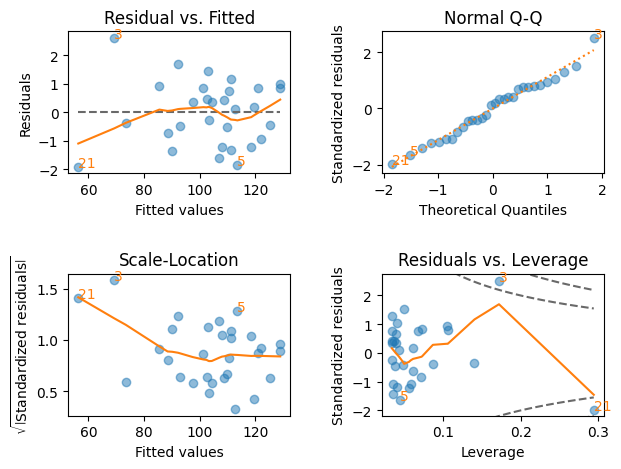

In [2]:
statsmodels_lm = sm.OLS(y, X).fit()
lmdiag.plot(statsmodels_lm);

### For `linearmodels`

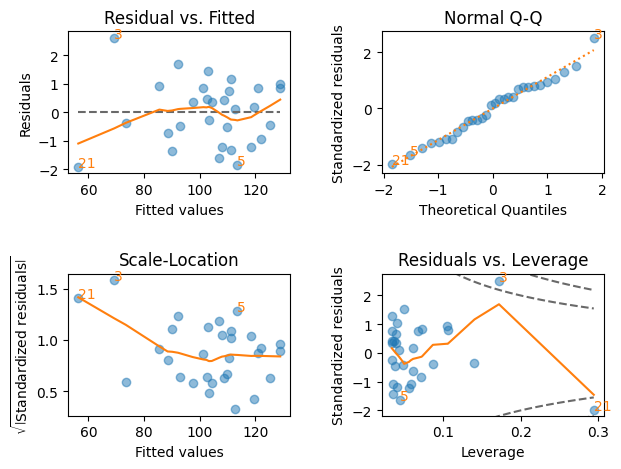

In [3]:
linearmodels_lm = IV2SLS(y, X, None, None).fit(cov_type="unadjusted")
lmdiag.plot(linearmodels_lm);

### For `sklearn`

_Note:_ As sklearn's `LinearRegression` doesn't compute some of statistics required by `lmdiag`, you need to additionally pass the **training data used to fit the model**, so the missing statistics can be computed by internally.

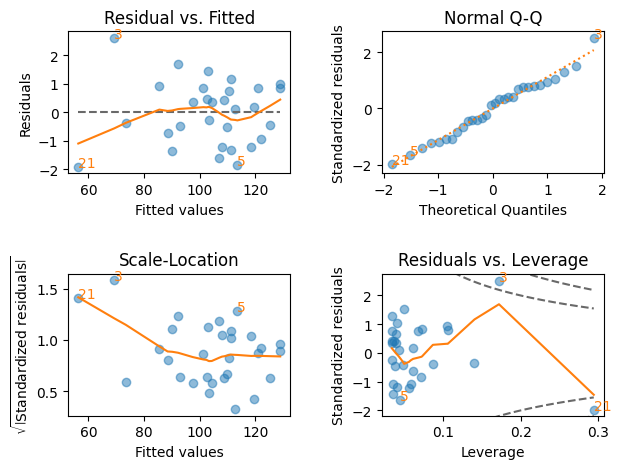

In [4]:
X_plain = X[:,1:]  # remove the intercept column which sklearn does not use
sklearn_lm = LinearRegression().fit(X_plain, y)
lmdiag.plot(sklearn_lm, x=X_plain, y=y);

## Create individual plots

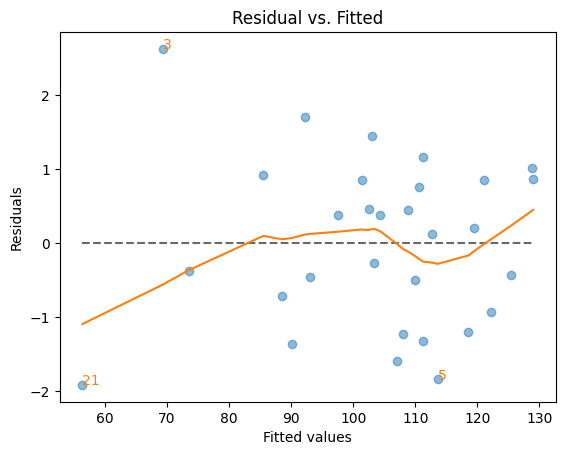

In [5]:
lmdiag.resid_fit(statsmodels_lm);

# Same for other charts:
# lmdiag.q_q(statsmodels_lm);
# lmdiag.scale_loc(statsmodels_lm);
# lmdiag.resid_lev(statsmodels_lm);

## Customize appearance

### Use a matplotlib style

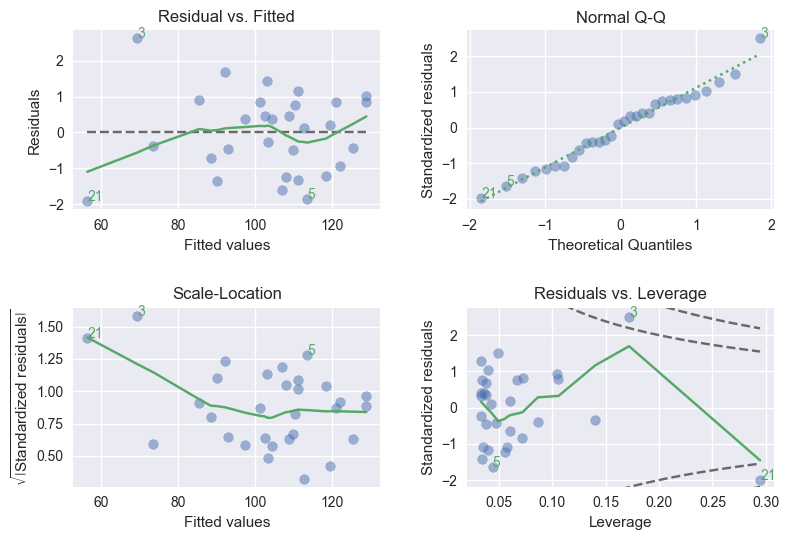

In [6]:
plt.style.use("seaborn-v0_8")
lmdiag.plot(statsmodels_lm);

### Modify the returned matplotlib.Figure

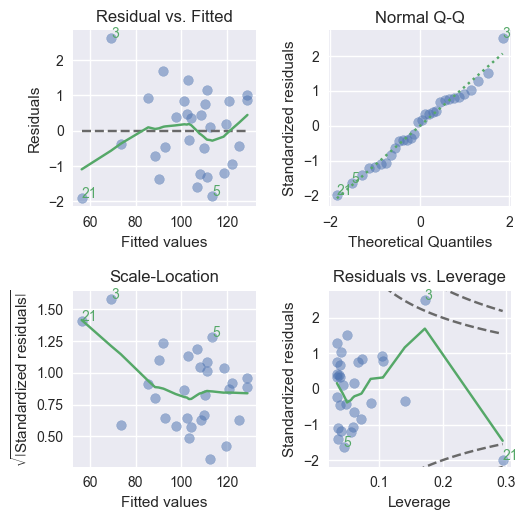

In [7]:
fig = lmdiag.plot(statsmodels_lm)
fig.set_size_inches(5, 5)
fig.tight_layout(pad=0, w_pad=2, h_pad=1.5)

### Use a lmdiag preset

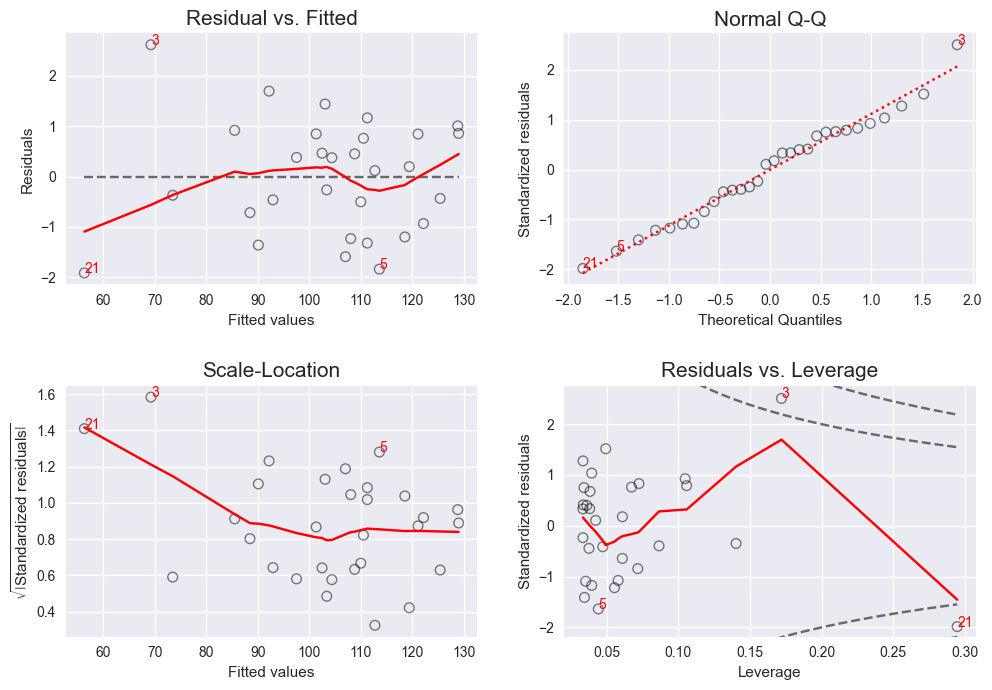

In [8]:
lmdiag.style.use(style="black_and_red")
lmdiag.plot(statsmodels_lm);

### Override plotting kwargs

When `lmdiag` calls the various `mathplotlib` methods, it unpacks the corresponding dictionary from `lmdiag.style` as their `kwargs`. You can override the dictionaries to customize the plots. 

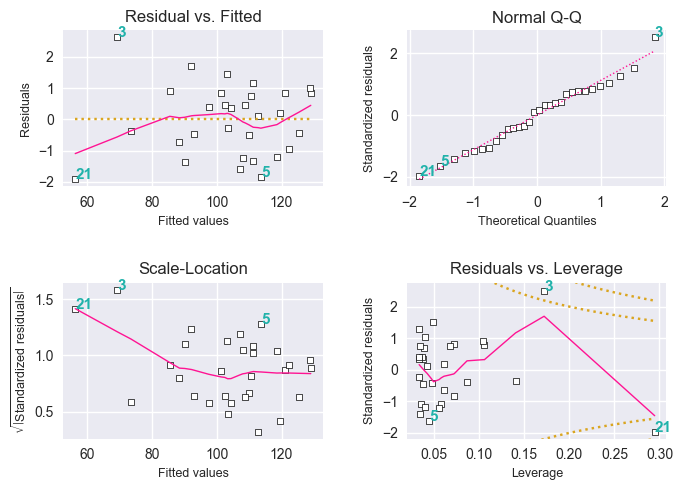

In [9]:
# Override the style dicts (which are passed in as kwargs to the various matplotlib methods) 
lmdiag.style.scatter.update({"s": 18, "marker":"s", "color": "white", "edgecolors": "black", "linewidth": 0.5, "alpha": 1})
lmdiag.style.plot.update({"color": "deeppink", "linewidth": 1})
lmdiag.style.plot_contour.update({"color": "goldenrod", "linestyle":"dotted"})
lmdiag.style.annotate.update({"color": "lightseagreen", "fontsize": 11, "fontweight": "bold"})
lmdiag.style.title.update({"fontsize": 12})
lmdiag.style.xy_label.update({"fontsize": 9})
lmdiag.style.subplots.update({"figsize": (7, 5)})

lmdiag.plot(statsmodels_lm);

## Print helpful information

**For all available charts:**

In [10]:
lmdiag.help()

        Name: Residuals vs. Fitted

      Method: lmdiag.resid_fit(lm)

      x-Axis: Fitted Values (Predicted y-hat from training data. If a link
              function exists, its inverse is applied)

      y-Axis: Residuals (The 'error' of the model; Distances of the y-hat
              values to the fitted regression line)

 Description: It's purpose is to identify non-linear patterns in the residuals.
              If you see a horizontal red line and the points spread around it
              without a recognizable pattern, chances are good, that there is
              no non-linear relationship in the data. If you can see clear
              pattern or a curve, a linear model might not be the best
              choice.The red labels show the indices of three observations with
              the highest absolute residuals.

        Name: Normal Q-Q

      Method: lmdiag.q_q(lm)

      x-Axis: Theoretical Quantiles (Quantiles from the Normal Distribution)

      y-Axis: Standardized

**Or for individual chart:**

In [11]:
lmdiag.help("resid_fit")

# Same for other charts:
# lmdiag.info('q_q')
# lmdiag.info('scale_loc')
# lmdiag.info('resid_lev')

        Name: Residuals vs. Fitted

      Method: lmdiag.resid_fit(lm)

      x-Axis: Fitted Values (Predicted y-hat from training data. If a link
              function exists, its inverse is applied)

      y-Axis: Residuals (The 'error' of the model; Distances of the y-hat
              values to the fitted regression line)

 Description: It's purpose is to identify non-linear patterns in the residuals.
              If you see a horizontal red line and the points spread around it
              without a recognizable pattern, chances are good, that there is
              no non-linear relationship in the data. If you can see clear
              pattern or a curve, a linear model might not be the best
              choice.The red labels show the indices of three observations with
              the highest absolute residuals.

